## MIS780 Advanced AI For Business - Assessment 1 - T2 2025

**Student Name:** _Sanh Dang Thai_

**Student ID:** _224117898_

## Table of Content

1. [Executive Summary](#cell_executivesummary)


2. [Data Exploration](#cell_exploration)


3. [Sentiment Analysis](#cell_sentiment)


4. [Topic Modeling](#cell_TopicModeling)


5. [Practical Implication](#cell_PracticalImplication)


<a id = "cell_executivesummary"></a>
### 1. Executive Summary




**Business Context & Problem Definition:**  
In today’s global and highly competitive airline industry, customer satisfaction is no longer a luxury—it is a **key differentiator** that shapes brand loyalty, influences purchasing decisions, and drives profitability. Airlines operate in an environment where **online reviews and customer feedback** significantly affect perception. Therefore, gaining deep insights into passenger experiences is essential.

The core business problem addressed in this project is:  
>**"What are the key drivers behind customer satisfaction and dissatisfaction in the airline industry, and how do these differ across airlines, cabin classes, and service categories?"**

---

**Approach & Methodology**

To solve the above problem, we performed a **comprehensive analysis** using a combination of structured data (ratings) and unstructured data (reviews):

1. **Quantitative Analysis**:
   - Identified **Top 10 Airlines** by overall and category-specific ratings (e.g., Food, Entertainment, Ground Service).
   - Compared **rating trends over time** for Qantas Airways versus top competitors.

2. **Sentiment Analysis**:
   - Calculated **average sentiment scores** per airline from review texts.
   - Identified airlines with the **most positive sentiment**, broken down by cabin class (Economy & Business).

3. **Topic Modeling (LDA)**:
   - Extracted key **themes and concerns** from passenger reviews.
   - Compared **Top 3 vs. Bottom 3 Airlines** to highlight differences in passenger priorities.

4. **Visualizations**:
   - Used **charts, bar plots, and word clouds** to effectively communicate insights.

---

**Key Findings**

- **Top-rated airlines** (e.g., Hainan, ANA, EVA Air) consistently received **high scores** and **positive sentiment** across categories like service, food, and entertainment.
  
- **Lower-rated airlines** (e.g., Frontier, Volotea) had repeated complaints about **delays, poor communication, and refund issues**.

- **Sentiment Analysis** revealed:
  - **Hainan Airlines** had the highest overall positive sentiment.
  - **Royal Air Maroc** and **Hainan Airlines** led in Business and Economy class service sentiment, respectively.

- **Qantas Airways** showed a **declining trend** in overall rating over time, compared to rising or stable trends in top airlines—suggesting a potential need for internal review.

- **Topic Modeling** showed distinct differences:
  - **Top 3 airlines**: Topics included comfort, service, meals, and smooth processes.
  - **Bottom 3 airlines**: Topics were dominated by complaints on delays, refunds, baggage issues, and customer service problems.

---

**Business Implications & Recommendations**

- **Improve Service Recovery**: Address refund delays, communication, and time management in lower-rated airlines.

- **Benchmark Performance**: Airlines like Qantas should compare themselves with higher-performing airlines to **identify service gaps**.

- **Targeted Improvements**: Use sentiment insights to enhance specific areas like **entertainment in Business class** or **meals in Economy**.

- **Marketing Opportunities**: Airlines with top sentiment can leverage this in **brand positioning and campaigns**.

---


This project provides a **data-driven view** of customer sentiment and ratings across the airline industry. By integrating **text mining, topic modeling, and sentiment scoring**, we identified the **main drivers of satisfaction and dissatisfaction**. These insights empower airline stakeholders to enhance operations, service quality, and **customer loyalty** in a highly competitive market.



### 2. Data Exploration




### Loading Data


In [38]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('C:/Users/SanhDang/Downloads/A1_dataset.csv')

# Preview and basic checks
df.head()
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74000 entries, 0 to 73999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AirlineName          74000 non-null  object
 1   CabinType            74000 non-null  object
 2   DateFlown            74000 non-null  object
 3   EntertainmentRating  74000 non-null  int64 
 4   FoodRating           74000 non-null  int64 
 5   GroundServiceRating  74000 non-null  int64 
 6   OriginCountry        74000 non-null  object
 7   OverallScore         74000 non-null  int64 
 8   Recommended          74000 non-null  object
 9   Review               74000 non-null  object
 10  SeatComfortRating    74000 non-null  int64 
 11  ServiceRating        74000 non-null  int64 
 12  Title                74000 non-null  object
 13  TravelType           74000 non-null  object
 14  ValueRating          74000 non-null  int64 
 15  WifiRating           74000 non-null  int64 
 16  uniq

AirlineName            0
CabinType              0
DateFlown              0
EntertainmentRating    0
FoodRating             0
GroundServiceRating    0
OriginCountry          0
OverallScore           0
Recommended            0
Review                 0
SeatComfortRating      0
ServiceRating          0
Title                  0
TravelType             0
ValueRating            0
WifiRating             0
unique_id              0
dtype: int64

### Custom Data with Student ID

In [39]:
student_id = 224117898  # replace with student ID
np.random.seed(student_id)
df_sample = df.sample(n=50000, random_state=student_id)
df_sample.head()

,AirlineName,CabinType,DateFlown,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,Recommended,Review,SeatComfortRating,ServiceRating,Title,TravelType,ValueRating,WifiRating,unique_id
15321,American Airlines,Economy Class,12/15/2025,1,2,2,Italy,6,no,Flew Chicago to Miami with my girlfriend on De...,3,3,felt like being on a bus,Couple Leisure,3,0,15322
5755,Air New Zealand,Economy Class,1/20/2025,0,0,5,Australia,9,yes,The experience from Norfolk Island to Sydney w...,4,5,cannot speak highly enough,Couple Leisure,5,0,5756
52364,Silver Airways,Economy Class,9/19/2025,0,0,1,UnitedStates,1,no,Tampa to Nassau. Never again will I fly Silver...,1,4,noisy and uncomfortable,Couple Leisure,1,0,52365
59669,Spirit Airlines,Economy Class,12/15/2025,1,1,1,UnitedStates,1,no,If you're military and you're flying on orders...,1,4,do not fly with Spirit,Solo Leisure,1,0,59670
9216,ANA All Nippon Airways,Economy Class,9/15/2025,5,3,3,UnitedKingdom,8,yes,Dedicated check in area at Itami Airport for i...,4,5,helpful cabin attendants,Business,3,5,9217


**Question A – Top 10 Airlines and Service Comparison**

**Step 1. Group by AirlineName and CabinType to get mean scores**

In [40]:
# Step 1: Calculate average OverallScore by Airline and CabinType
overall_avg = df_sample.groupby(['AirlineName', 'CabinType'])['OverallScore'].mean().reset_index()

# Sort and get top 10 overall
top10_overall = overall_avg.sort_values(by='OverallScore', ascending=False).head(10)
top10_overall

,AirlineName,CabinType,OverallScore
182,Sunwing Airlines,Business Class,10.000000
190,Thai Smile Airways,Business Class,9.666667
213,Volotea,Business Class,9.000000
10,Air Astana,Business Class,8.827586
105,Hainan Airlines,Business Class,8.800000
76,EVA Air,Business Class,8.698413
68,China Southern Airlines,Business Class,8.555932
106,Hainan Airlines,Economy Class,8.506579
28,Air Serbia,Business Class,8.333333
34,AirAsia X,Business Class,8.222222


**Step 2. Sub-rating Comparisons**

In [41]:
# Entertainment
entertainment_avg = df_sample.groupby('AirlineName')['EntertainmentRating'].mean().sort_values(ascending=False).head(10)

# Food
food_avg = df_sample.groupby('AirlineName')['FoodRating'].mean().sort_values(ascending=False).head(10)

# Ground Service
ground_avg = df_sample.groupby('AirlineName')['GroundServiceRating'].mean().sort_values(ascending=False).head(10)


**Step 3. Display All Top 10 Lists**

In [42]:
print("🎖 Top 10 Airlines by Overall Score (any cabin type):")
print(top10_overall)

print("\n🎬 Top 10 Airlines by EntertainmentRating:")
print(entertainment_avg)



🎖 Top 10 Airlines by Overall Score (any cabin type):
                 AirlineName       CabinType  OverallScore
182         Sunwing Airlines  Business Class     10.000000
190       Thai Smile Airways  Business Class      9.666667
213                  Volotea  Business Class      9.000000
10                Air Astana  Business Class      8.827586
105          Hainan Airlines  Business Class      8.800000
76                   EVA Air  Business Class      8.698413
68   China Southern Airlines  Business Class      8.555932
106          Hainan Airlines   Economy Class      8.506579
28                Air Serbia  Business Class      8.333333
34                 AirAsia X  Business Class      8.222222

🎬 Top 10 Airlines by EntertainmentRating:
AirlineName
Qatar Airways              3.730241
Hainan Airlines            3.698113
Singapore Airlines         3.518341
Cathay Pacific Airways     3.473161
Emirates                   3.430608
EVA Air                    3.375000
ANA All Nippon Airways     

In [43]:

print("\n🍱 Top 10 Airlines by FoodRating:")
print(food_avg)

print("\n🛬 Top 10 Airlines by GroundServiceRating:")
print(ground_avg)



🍱 Top 10 Airlines by FoodRating:
AirlineName
Hainan Airlines            4.316038
ANA All Nippon Airways     3.936170
Air Astana                 3.927711
China Southern Airlines    3.917441
Qatar Airways              3.831615
Garuda Indonesia           3.818991
EVA Air                    3.806818
Japan Airlines             3.733813
Vistara                    3.718182
Korean Air                 3.493421
Name: FoodRating, dtype: float64

🛬 Top 10 Airlines by GroundServiceRating:
AirlineName
ANA All Nippon Airways     4.281915
Hainan Airlines            4.231132
China Southern Airlines    4.187822
Thai Smile Airways         3.931677
Japan Airlines             3.928058
EVA Air                    3.926136
Garuda Indonesia           3.881306
Vistara                    3.863636
Singapore Airlines         3.816587
Qatar Airways              3.782646
Name: GroundServiceRating, dtype: float64


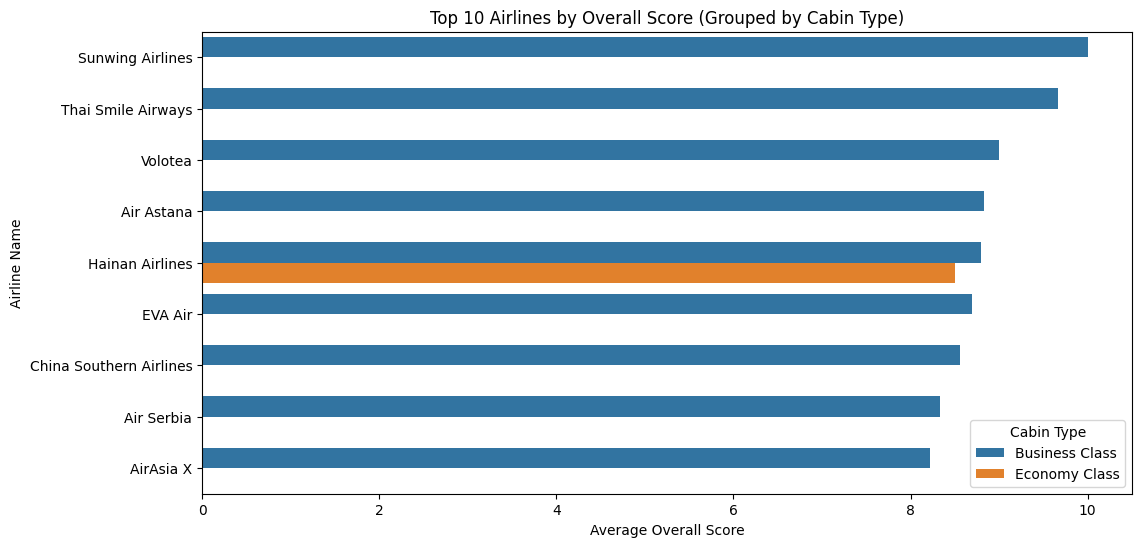

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot top 10 overall
plt.figure(figsize=(12,6))
sns.barplot(data=top10_overall, x='OverallScore', y='AirlineName', hue='CabinType')
plt.title('Top 10 Airlines by Overall Score (Grouped by Cabin Type)')
plt.xlabel('Average Overall Score')
plt.ylabel('Airline Name')
plt.legend(title='Cabin Type')
plt.show()

**Step 4. Check for Qantas or Jetstar in All Lists**

In [45]:
airlines_to_check = ['Qantas Airways', 'Jetstar Airways']

# Check appearance in top overall
for airline in airlines_to_check:
    if airline in top10_overall['AirlineName'].values:
        print(f"{airline} appears in Top 10 Overall.")
    else:
        print(f"{airline} does NOT appear in Top 10 Overall.")

# Check other lists
for airline in airlines_to_check:
    print(f"\nChecking {airline}:")
    print("In Entertainment Top 10:", airline in entertainment_avg.index)
    print("In Food Top 10:", airline in food_avg.index)
    print("In Ground Service Top 10:", airline in ground_avg.index)


Qantas Airways does NOT appear in Top 10 Overall.
Jetstar Airways does NOT appear in Top 10 Overall.

Checking Qantas Airways:
In Entertainment Top 10: False
In Food Top 10: False
In Ground Service Top 10: False

Checking Jetstar Airways:
In Entertainment Top 10: False
In Food Top 10: False
In Ground Service Top 10: False


**Comment:**

**1. Top 10 Airlines by Overall Score**

The top 10 airlines based on Overall Score (across all cabin types) are predominantly Business Class focused. The top scorers include:

- Sunwing Airlines (10.0)

- Thai Smile Airways, Volotea, and Air Astana (scores above 8.8)

- Hainan Airlines appears twice (in both Business and Economy class), showing consistency across cabin types.

- These airlines seem to offer exceptional service, particularly in Business Class, which likely contributes to their high overall ratings.

**2. Top 10 Airlines by Entertainment Rating**

When it comes to in-flight entertainment, the leading airlines include:

- Qatar Airways, Hainan Airlines, and Singapore Airlines with ratings above 3.5.

- EVA Air, Cathay Pacific Airways, ANA, and China Southern Airlines also perform strongly.

- This list shows more variation, with some airlines appearing here but not in the overall top 10, suggesting that entertainment may not be the sole factor influencing overall satisfaction.

**3. Top 10 Airlines by Food Rating**

In terms of Food Rating, we observe:

- Hainan Airlines leading the list with a score of 4.31.

- ANA, Air Astana, and China Southern Airlines also consistently perform well.

- EVA Air and Garuda Indonesia appear here, reflecting strength in inflight dining.

- These ratings demonstrate that meal service quality is relatively high among the top international airlines.

**4. Top 10 Airlines by Ground Service Rating**

Ground service excellence is shown by:

- ANA All Nippon Airways, Hainan Airlines, and China Southern Airlines (all above 4.1).

- Thai Smile Airways, Japan Airlines, and EVA Air also received high ratings.

This indicates reliable pre- and post-flight experiences such as check-in, baggage handling, and staff interactions.

**5. Key Observations**

- Hainan Airlines, Air Astana, EVA Air, and China Southern Airlines appear consistently across multiple categories, demonstrating strong and balanced service offerings.

- Some airlines excel in specific areas (e.g., Qatar Airways in entertainment) but may not be in the top 10 overall—possibly due to other weaker aspects.

- Business Class experiences are dominant in the Overall Score top 10, highlighting the impact of premium service levels on customer satisfaction.



**Step 5. Top 10 and Bottom 10 Airlines by “Recommended” Count**

In [46]:
# Filter only where Recommended == 'yes'
recommended_df = df_sample[df_sample['Recommended'].str.lower() == 'yes']

# Count recommendations by airline and cabin
recommended_counts = recommended_df.groupby(['AirlineName', 'CabinType']).size().reset_index(name='YesCount')

# Sort to get top 10 and bottom 10
top10_recommended = recommended_counts.sort_values(by='YesCount', ascending=False).head(10)
bottom10_recommended = recommended_counts.sort_values(by='YesCount', ascending=True).head(10)

print("\n Top 10 Most Recommended Airlines (by cabin):")
print(top10_recommended)

print("\n Bottom 10 Least Recommended Airlines (by cabin):")
print(bottom10_recommended)



 Top 10 Most Recommended Airlines (by cabin):
                 AirlineName       CabinType  YesCount
66   China Southern Airlines   Economy Class       588
149            Qatar Airways   Economy Class       500
148            Qatar Airways  Business Class       389
54           British Airways   Economy Class       351
155                  Ryanair   Economy Class       348
72           Delta Air Lines   Economy Class       319
171          Spirit Airlines   Economy Class       318
133                Lufthansa   Economy Class       302
164       Singapore Airlines   Economy Class       299
188         Turkish Airlines   Economy Class       299

 Bottom 10 Least Recommended Airlines (by cabin):
            AirlineName       CabinType  YesCount
98                GoAir  Business Class         1
94    Frontier Airlines  Business Class         1
169            SpiceJet  Business Class         1
167  Southwest Airlines  Business Class         1
154             Ryanair  Business Class        

**Step 6. Check Qantas/Jetstar Recommendation Ranking**


In [47]:
for airline in airlines_to_check:
    if airline in top10_recommended['AirlineName'].values:
        print(f"{airline} is in the Top 10 Most Recommended.")
    elif airline in bottom10_recommended['AirlineName'].values:
        print(f"{airline} is in the Bottom 10 Least Recommended.")
    else:
        print(f"{airline} is not in Top or Bottom 10 Recommended.")


Qantas Airways is not in Top or Bottom 10 Recommended.
Jetstar Airways is not in Top or Bottom 10 Recommended.


**Comment:**

**Top 10 Most Recommended Airlines**

- China Southern Airlines and Qatar Airways dominate the top of the list in Economy Class, with 588 and 500 recommendations respectively.

- Qatar Airways also ranks highly in Business Class (389), showcasing consistency in service quality across cabin types.

- Other airlines such as British Airways, Ryanair, and Delta Air Lines also perform strongly in Economy Class, all with over 300 recommendations.

- Airlines like Singapore Airlines, Lufthansa, and Turkish Airlines round out the top 10, suggesting a broad global presence among the most recommended airlines.

Observation: **Most of the top recommendations come from Economy Class, indicating customer satisfaction in the more price-sensitive segment.**

**Bottom 10 Least Recommended Airlines**
A total of 10 airlines have only 1 positive recommendation in Business Class.

- This includes GoAir, Frontier Airlines, SpiceJet, Southwest Airlines, and Volotea, among others.

- Ryanair appears in both top and bottom lists, but in different cabin types (Economy vs. Business), which may suggest inconsistent service quality between classes.

- These airlines might have fewer Business Class customers, or deliver lower perceived value in premium cabins, leading to very low recommendation counts.

Observation: **All bottom-ranked airlines come from Business Class, indicating potential service gaps or lack of focus in premium offerings for these carriers.**

- **Qantas Airways and Jetstar Airways do not appear in either the Top 10 Most Recommended or the Bottom 10 Least Recommended airline lists.**

**Question B Requirement Summary**

**Step 1. Compute average overall score**

In [48]:
# Compute average overall score by airline
top5_airlines = df_sample.groupby('AirlineName')['OverallScore'].mean().sort_values(ascending=False).head(5).index.tolist()

print("Top 5 Airlines by OverallScore:", top5_airlines)


Top 5 Airlines by OverallScore: ['Hainan Airlines', 'ANA All Nippon Airways', 'China Southern Airlines', 'Air Astana', 'Garuda Indonesia']


In [49]:
# Convert 'DateFlown' column
df_sample['DateFlown'] = pd.to_datetime(df_sample['DateFlown'], errors='coerce')

**Step 2. Draw Overall Rating Trends Over Time – Qantas vs Top 5 Airlines**

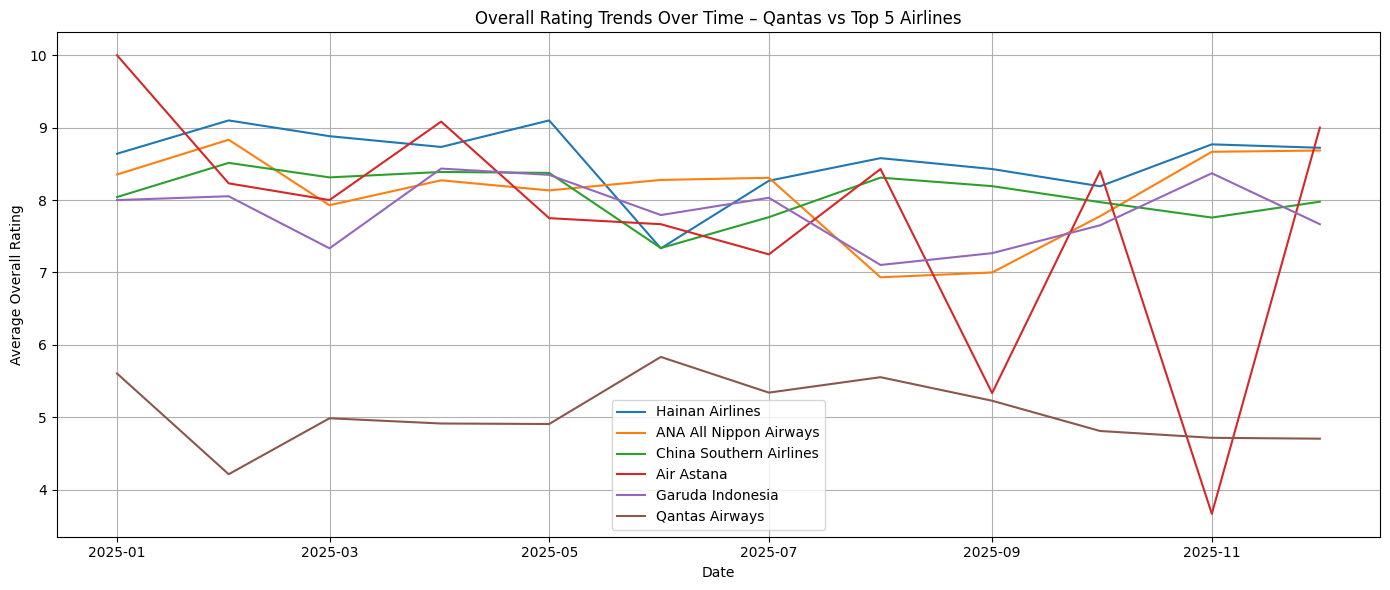

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Add Qantas separately
airlines_to_plot = top5_airlines + ['Qantas Airways']

for airline in airlines_to_plot:
    airline_df = df_sample[df_sample['AirlineName'] == airline]
    monthly_avg = airline_df.groupby(airline_df['DateFlown'].dt.to_period('M'))['OverallScore'].mean()
    
    # Drop months with missing values
    monthly_avg = monthly_avg.dropna()
    
    plt.plot(monthly_avg.index.to_timestamp(), monthly_avg.values, label=airline)

plt.title("Overall Rating Trends Over Time – Qantas vs Top 5 Airlines")
plt.xlabel("Date")
plt.ylabel("Average Overall Rating")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Comment:**

**1. Overview of Overall Rating Trends Over Time**
- The line chart illustrates the average overall ratings of Qantas Airways compared to the top 5 rated airlines over the observed time period.

- Qantas Airways consistently maintains lower average ratings, ranging approximately from 4.2 to 5.8.

- In contrast, top airlines such as Hainan Airlines, ANA All Nippon Airways, and Air Astana consistently receive high ratings, typically ranging between 7.5 and 9.5, with minimal fluctuations.

- This clearly positions Qantas significantly below the benchmark set by top-performing competitors.

**2. Noticeable Patterns or Trends**
- Qantas shows mild downward trend in recent months, with no signs of strong recovery.

- The top 5 airlines demonstrate relative stability in customer satisfaction over time.

- Some airlines like Air Astana exhibit occasional dips, but still remain well above Qantas.

**3. Possible Factors Influencing Trends**

Several factors could explain the lagging performance of Qantas Airways:

- Service quality gaps: Lower scores may reflect issues in inflight services, punctuality, staff attitude, or cleanliness.

- Expectation mismatch: Domestic carriers may face higher expectations from local customers, leading to harsher reviews.

- Operational or economic challenges: Cost-cutting, staffing issues, or route changes could influence passenger satisfaction.

**Conclusion**
- Overall, Qantas Airways is significantly underperforming in comparison to top airlines. The trend appears consistently flat or declining, suggesting the need for strategic interventions to improve service and customer perception over time.

<a id = "cell_sentiment"></a>
### 3. Sentiment Analysis


**Question C. Compare the overall sentiments expressed by customers about airlines. Find airlines received themost positive sentiments**

**Step 1. Make A function and apply to the data**

In [51]:
def get_sentiment(text):
    if pd.isnull(text):
        return 0
    return TextBlob(str(text)).sentiment.polarity
from textblob import TextBlob
df_sample['Sentiment'] = df_sample['Review'].apply(get_sentiment)

**Step 2. Show Top 10 Airlines by Positive Sentiment**

In [52]:
# Group by airline and calculate average sentiment
airline_sentiment = df_sample.groupby('AirlineName')['Sentiment'].mean().sort_values(ascending=False)

# Display top 10
print("Top 10 Airlines by Positive Sentiment:")
print(airline_sentiment.head(10))

Top 10 Airlines by Positive Sentiment:
AirlineName
Hainan Airlines            0.301586
EVA Air                    0.267205
Vistara                    0.266948
ANA All Nippon Airways     0.257937
Air Astana                 0.257766
Thai Smile Airways         0.250928
China Southern Airlines    0.236408
Qatar Airways              0.234278
Garuda Indonesia           0.231417
Japan Airlines             0.223404
Name: Sentiment, dtype: float64


**Step 3. Build chart shows Top 10 Airlines by Average Sentiment**

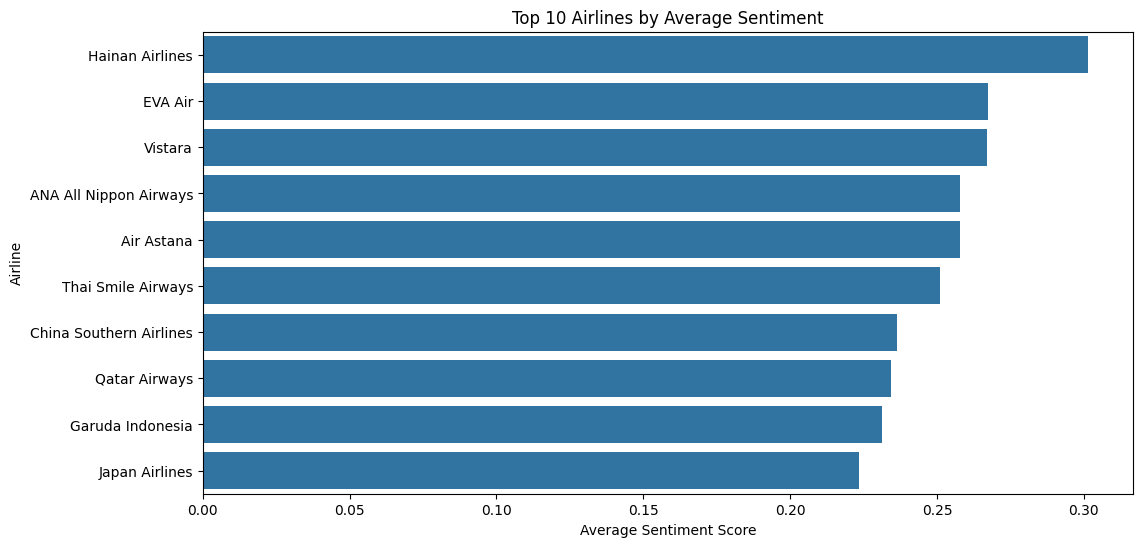

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=airline_sentiment.head(10).values, y=airline_sentiment.head(10).index)
plt.title("Top 10 Airlines by Average Sentiment")
plt.xlabel("Average Sentiment Score")
plt.ylabel("Airline")
plt.show()


**Comment:**

**The analysis reveals the Top 10 airlines with the highest average sentiment scores based on customer reviews.**

- Hainan Airlines ranks 1st, with the highest positive sentiment score of 0.3016, indicating a strong level of customer satisfaction.

Other highly rated airlines include:

- EVA Air (0.2672)

- Vistara (0.2669)

- ANA All Nippon Airways (0.2579)

- Air Astana (0.2578)

This result is also reflected visually in the horizontal bar chart, where Hainan Airlines clearly stands out at the top.

**Observations:**
- These airlines are consistently present across other top performance metrics such as overall score, entertainment, food, and ground service ratings, which reinforces the alignment between quantitative scores and customer sentiment.

- Qatar Airways appears 8th, showing that while it enjoys a solid reputation, it may not evoke as strong emotional positivity as some of the other top-rated carriers.

**Conclusion:**
- **Hainan Airlines received the most positive sentiments from customers, indicating not just good service quality but also an emotional connection or satisfaction expressed in user reviews.**

**Question D. Identify the airline that received the most positive sentiment for their Economy class and Business Class “service/s”.**

In [54]:
import pandas as pd
from textblob import TextBlob

# 1. Clean review text and cabin type
df_sample['Review'] = df_sample['Review'].astype(str).str.lower()
df_sample['CabinType'] = df_sample['CabinType'].astype(str).str.lower()

# 2. Filter: Only reviews mentioning "service" and belonging to Economy/Business
df_service = df_sample[
    df_sample['Review'].str.contains(r'\bservice\b', na=False) &
    df_sample['CabinType'].str.contains('economy|business', na=False)
].copy()

# 3. Normalize cabin name into a clean label
df_service['CabinGroup'] = df_service['CabinType'].apply(
    lambda x: 'Economy' if 'economy' in x else ('Business' if 'business' in x else 'Other')
)

# 4. Sentiment analysis using TextBlob
df_service['Sentiment'] = df_service['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# 5. Group and calculate average sentiment
grouped_sentiment = df_service.groupby(['CabinGroup', 'AirlineName'])['Sentiment'].mean().reset_index()

# 6. Get the top airline for each cabin group
top_eco = grouped_sentiment[grouped_sentiment['CabinGroup'] == 'Economy'].sort_values(by='Sentiment', ascending=False).head(1)
top_bus = grouped_sentiment[grouped_sentiment['CabinGroup'] == 'Business'].sort_values(by='Sentiment', ascending=False).head(1)

print("Economy Class – Top Service Sentiment:\n", top_eco)
print("Business Class – Top Service Sentiment:\n", top_bus)


Economy Class – Top Service Sentiment:
     CabinGroup      AirlineName  Sentiment
156    Economy  Hainan Airlines   0.324153
Business Class – Top Service Sentiment:
    CabinGroup      AirlineName  Sentiment
71   Business  Royal Air Maroc   0.432072


**Comment:**

**The sentiment analysis reveals clear leaders in customer satisfaction by cabin type.**

- Hainan Airlines received the highest positive sentiment among Economy Class passengers.

- Royal Air Maroc achieved the highest sentiment score for Business Class service reviews.

**These findings suggest that both airlines have successfully delivered a service experience that resonates positively with their respective passenger groups. The results also highlight the importance of segment-specific excellence—showing that different airlines may perform better depending on the cabin class.**

### 4. Topic modelling

**Question E. What are the concerns and interests of passengers when flying with an airline?**


**Step 1. Clean Text**

In [55]:
from nltk.stem import PorterStemmer #Stemming Package
import re  #Regular expression operation package
porter = PorterStemmer()
documents = df_sample['Review']
Cleaned_doc = []
for r in range(len(documents)):
    review = documents.iloc[r]
    try:
        # removing everythi ng except alphabets
        review = re.sub('[^A-Za-z]', ' ', review)
        # make all text lowercase
        review = review.lower()
        # apply tokenization
        Tokens = review.split()
        # apply stemming operation (Optional)
        #for t in range(len(Tokens)):
        #    Tokens[t] = porter.stem(Tokens[t])
        # removing short words
        Filtered_token = [w for w in Tokens if len(w)>3]
        review = ' '.join(Filtered_token)
    except:
        continue
    #Save cleaned text
    Cleaned_doc.append(review)

**Step 2. Remove Stop Words**

In [56]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')
# Remove Stop Words
for r in range(len(Cleaned_doc)):
    each_item = []
    for t in Cleaned_doc[r].split():
        if t not in stop_words:
             each_item.append(t)
    Cleaned_doc[r] = ' '.join(each_item)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SanhDang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()# Fit and transform the processed titles

count_data = count_vectorizer.fit_transform(Cleaned_doc)
count_data

<50000x35149 sparse matrix of type '<class 'numpy.int64'>'
	with 2609113 stored elements in Compressed Sparse Row format>

**Step 3. Find 40 most common words**

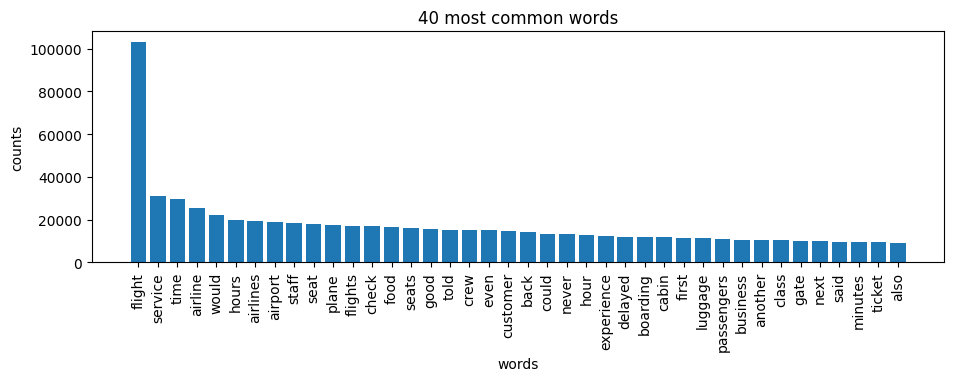

In [58]:
import numpy as np
from matplotlib import pyplot

terms = count_vectorizer.get_feature_names_out()

# Count the popularity of words
total_counts = np.zeros(len(terms))
for t in count_data:
    total_counts+=t.toarray()[0]

count_dict = (zip(terms, total_counts))
count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:40] #Take the top 40 words

words = [w[0] for w in count_dict]
counts = [w[1] for w in count_dict]
x_pos = np.arange(len(words))

pyplot.figure(2, figsize=(11, 3))
pyplot.subplot(title='40 most common words')
pyplot.bar(words, counts)
pyplot.xticks(x_pos, words, rotation=90)
pyplot.xlabel('words')
pyplot.ylabel('counts')
pyplot.show()

**Step 4. Remove highly frequent and infrequent words**

In [59]:
#Remove highly frequent and infrequent words
keepIndex = [];
for t in range(len(total_counts)):
    if total_counts[t] < 10000 and total_counts[t] > 1000:
        keepIndex.append(t)

print('Number of Terms Remained: ', len(keepIndex))

#Save the remain ing term and frequency data
ReducedTerm = [terms[t] for t in keepIndex]
ReducedCount = count_data[:,keepIndex]
ReducedCount

Number of Terms Remained:  605


<50000x605 sparse matrix of type '<class 'numpy.int64'>'
	with 1278363 stored elements in Compressed Sparse Row format>

**Step 5. Train model**

In [60]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Tweak the two parameters below
number_topics = 10

lda = LDA(n_components=number_topics, n_jobs=-1, random_state=2023)
lda.fit(ReducedCount)
#Trained LDA model
lda.components_

array([[2.35609196e+02, 5.77484912e+01, 2.17623014e+02, ...,
        1.75547764e+02, 3.87541787e+02, 4.73440549e+02],
       [8.68118384e+02, 2.56536368e+02, 5.01360804e+01, ...,
        5.47076919e+02, 1.12293239e+02, 8.16435871e+01],
       [1.43910873e+02, 6.44296368e+01, 4.58918189e+01, ...,
        4.44034996e+01, 1.98818159e+02, 5.76912557e+01],
       ...,
       [3.44582626e+02, 3.04592716e+02, 1.49204738e+01, ...,
        7.85226351e+00, 1.03895369e+02, 4.75374663e+02],
       [1.71381091e+02, 5.21784958e+02, 2.05437840e+00, ...,
        1.00622546e+03, 1.45559330e+03, 8.90119837e+01],
       [2.52950789e+02, 5.46374196e-01, 5.90718113e+02, ...,
        3.70735505e+01, 3.84483723e+01, 7.61498353e+01]])

In [61]:
#Word Probablities in Topics
Word_Topics_Pro = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]
print(Word_Topics_Pro)

[[1.41855924e-03 3.47692948e-04 1.31026778e-03 ... 1.05694051e-03
  2.33331718e-03 2.85049768e-03]
 [4.34658339e-03 1.28445237e-03 2.51026425e-04 ... 2.73916034e-03
  5.62241206e-04 4.08781413e-04]
 [1.07690961e-03 4.82137964e-04 3.43416310e-04 ... 3.32278963e-04
  1.48779020e-03 4.31713508e-04]
 ...
 [2.09485059e-03 1.85173651e-03 9.07073106e-05 ... 4.77369362e-05
  6.31619987e-04 2.88998579e-03]
 [1.54053191e-03 4.69028627e-03 1.84666550e-05 ... 9.04488601e-03
  1.30842202e-02 8.00122117e-04]
 [2.96017567e-03 6.39398519e-06 6.91292322e-03 ... 4.33856018e-04
  4.49944973e-04 8.91149184e-04]]


**Step 6. Review top 10 topic of the passenger**

In [62]:
for topic_idx, topic in enumerate(Word_Topics_Pro):
    print("\nTopic #%d:" % topic_idx)
    count_dict = (zip(ReducedTerm, topic))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:5]
    for w in count_dict:
        print(w[0], ': {0:.3f}'.format(w[1]))


Topic #0:
entertainment : 0.025
great : 0.022
comfortable : 0.020
airways : 0.020
economy : 0.018

Topic #1:
refund : 0.029
ticket : 0.028
booked : 0.019
cancelled : 0.018
email : 0.015

Topic #2:
meal : 0.031
water : 0.024
served : 0.017
asked : 0.016
singapore : 0.013

Topic #3:
friendly : 0.023
nice : 0.015
aircraft : 0.015
comfortable : 0.013
short : 0.013

Topic #4:
american : 0.026
delta : 0.021
spirit : 0.017
people : 0.015
rude : 0.014

Topic #5:
next : 0.020
hotel : 0.019
said : 0.017
line : 0.015
minutes : 0.012

Topic #6:
extra : 0.028
carry : 0.028
paid : 0.021
bags : 0.020
baggage : 0.018

Topic #7:
delay : 0.031
baggage : 0.019
late : 0.017
minutes : 0.016
lost : 0.016

Topic #8:
worst : 0.023
istanbul : 0.019
ever : 0.017
dubai : 0.016
turkish : 0.016

Topic #9:
lounge : 0.041
china : 0.024
terminal : 0.019
security : 0.018
ground : 0.016


In [63]:
# View full Word Probabilities by Topic Matrix
df_topic_keywords = pd.DataFrame(Word_Topics_Pro)
df_topic_keywords.columns = ReducedTerm
df_topic_keywords

,able,absolutely,access,actually,additional,advance,agent,agents,ahead,aircraft,...,worked,working,world,worse,worst,worth,wrong,year,years,york
0,0.001419,0.000348,0.001310,0.000849,0.000211,0.000094,0.000001,0.000016,0.000071,0.012826,...,0.001801,0.001857,0.002204,0.000133,4.241962e-06,0.000948,0.000134,0.001057,0.002333,0.002850
1,0.004347,0.001284,0.000251,0.001762,0.002707,0.002648,0.004651,0.000603,0.000487,0.000020,...,0.000292,0.000745,0.000352,0.000549,1.190982e-03,0.000916,0.001128,0.002739,0.000562,0.000409
2,0.001077,0.000482,0.000343,0.001245,0.000140,0.000062,0.000007,0.000005,0.000514,0.007751,...,0.000181,0.002829,0.000975,0.002078,1.673369e-03,0.000239,0.001068,0.000332,0.001488,0.000432
3,0.001753,0.000120,0.000130,0.001757,0.000188,0.000664,0.000045,0.000231,0.003040,0.014515,...,0.002020,0.000277,0.000138,0.000269,7.354839e-07,0.002210,0.000052,0.001262,0.001846,0.001026
4,0.003206,0.003102,0.000010,0.001874,0.000376,0.000119,0.000795,0.001078,0.000630,0.000202,...,0.000536,0.002039,0.000469,0.001533,1.135338e-02,0.003177,0.002048,0.003050,0.002161,0.002390
5,0.004934,0.001456,0.000147,0.001232,0.000944,0.000299,0.009286,0.003249,0.000955,0.000105,...,0.000472,0.001553,0.000133,0.000389,3.302182e-03,0.000703,0.001304,0.001073,0.000387,0.000353
6,0.002866,0.001713,0.000716,0.001722,0.005106,0.001989,0.002702,0.000631,0.000973,0.001538,...,0.000232,0.000356,0.000415,0.001223,2.405048e-03,0.002068,0.000743,0.000601,0.000833,0.000612
7,0.002095,0.001852,0.000091,0.001768,0.000697,0.000041,0.000002,0.000002,0.000042,0.004444,...,0.000022,0.000786,0.000427,0.001429,9.003024e-03,0.000593,0.001816,0.000048,0.000632,0.002890
8,0.001541,0.004690,0.000018,0.001316,0.000216,0.000357,0.000187,0.000751,0.000001,0.000647,...,0.000417,0.002414,0.002850,0.004441,2.289375e-02,0.001837,0.001807,0.009045,0.013084,0.000800
9,0.002960,0.000006,0.006913,0.000419,0.000372,0.000274,0.001919,0.000325,0.000276,0.006810,...,0.001241,0.000365,0.000662,0.000089,3.049137e-06,0.000283,0.000554,0.000434,0.000450,0.000891


**Make a chart about top 10 topic**

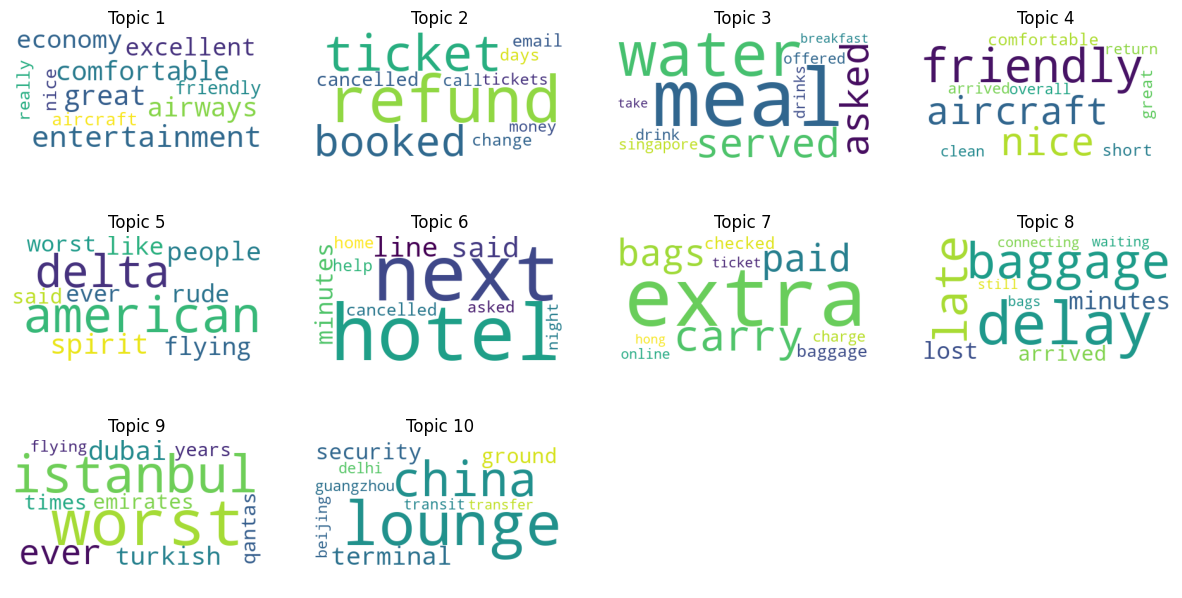

In [64]:

from wordcloud import WordCloud
import math
rows = math.ceil(len(Word_Topics_Pro)/4)
fig, ax = pyplot.subplots(rows, 4, figsize=(15,2.5*rows))
[axi.set_axis_off() for axi in ax.ravel()]
for topic_idx, topic in enumerate(Word_Topics_Pro):
    count_dict = (zip(ReducedTerm, topic))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)
    # convert to dictionary type - keep top 10 words
    Word_Frequency = dict(count_dict[0:10])
    # generate word cloud
    wordcloud = WordCloud(background_color="white").generate_from_frequencies(Word_Frequency)
    # visualize word cloud in figure
    subfig_Row = math.floor(topic_idx/4)
    subfig_Col = math.ceil(topic_idx%4)
    ax[subfig_Row,subfig_Col].imshow(wordcloud)
    ax[subfig_Row,subfig_Col].set_title("Topic {}".format(topic_idx+1))
pyplot.show()

In [65]:
#Compute topic distribution for each document
TopicDis_Doc = lda.transform(ReducedCount)

#Compute overall topic distribution for all each documents
Overall_Topic_Dis = sum(TopicDis_Doc)/sum(sum(TopicDis_Doc))
Overall_Topic_Dis

array([0.12851679, 0.11637723, 0.08189568, 0.11417914, 0.10884634,
       0.11580213, 0.09003405, 0.10582817, 0.08409738, 0.05442308])

**Visualize topic distributions of review groups**

C:\Users\SanhDang\AppData\Local\Temp\ipykernel_27672\3678760577.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  pyplot.legend()


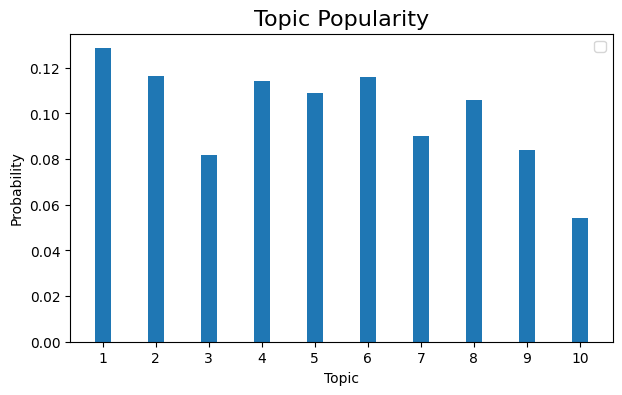

In [66]:
# Get the topic index
Bar_index = np.asarray(range(1,number_topics+1))

#Visualize topic distributions of review groups
pyplot.figure(figsize=(7,4))
pyplot.title('Topic Popularity', fontsize=16)
pyplot.xlabel('Topic')
pyplot.ylabel('Probability')
pyplot.bar(Bar_index, Overall_Topic_Dis.tolist(), 0.3)
pyplot.xticks(Bar_index, Bar_index)
pyplot.legend()
pyplot.show();

**Question F. What are the differences in concerns and interests between passengers flying on the top three-rated airlines and the bottom three-rated airlines?**

**Step 1: Compute average score and select top/bottom 3 airlines**


In [67]:
# Calculate the average score for each airline
airline_scores = df.groupby("AirlineName")["OverallScore"].mean().sort_values(ascending=False)

# Select top 3 and bottom 3 airlines
top_3_airlines = airline_scores.head(3).index.tolist()
bottom_3_airlines = airline_scores.tail(3).index.tolist()

# Filter data for top and bottom 3 airlines
df_top = df[df["AirlineName"].isin(top_3_airlines)].copy()
df_bottom = df[df["AirlineName"].isin(bottom_3_airlines)].copy()


**Step 2: Clean and preprocess the review text**

In [68]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re

# Initialize stemmer and stopwords
porter = PorterStemmer()
stop_words = stopwords.words('english')

# Text cleaning function
def clean_review(text):
    try:
        text = re.sub('[^A-Za-z]', ' ', str(text))  # Keep only letters
        text = text.lower()
        tokens = text.split()
        tokens = [w for w in tokens if len(w) > 3 and w not in stop_words]
        return ' '.join(tokens)
    except:
        return ""

# Apply cleaning
df_top['CleanedReview'] = df_top['Review'].apply(clean_review)
df_bottom['CleanedReview'] = df_bottom['Review'].apply(clean_review)


**Step 3: Vectorize the cleaned text**

In [69]:
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize top and bottom airlines separately
vectorizer_top = CountVectorizer()
vectorizer_bottom = CountVectorizer()

top_matrix = vectorizer_top.fit_transform(df_top['CleanedReview'])
bottom_matrix = vectorizer_bottom.fit_transform(df_bottom['CleanedReview'])

terms_top = vectorizer_top.get_feature_names_out()
terms_bottom = vectorizer_bottom.get_feature_names_out()


**Step 4: Filter out extremely rare or common terms**

In [70]:
import numpy as np

def filter_terms(count_data, terms, min_thresh=20, max_thresh=15000):
    total_counts = np.asarray(count_data.sum(axis=0)).flatten()
    keepIndex = []
    for t in range(len(total_counts)):
        if total_counts[t] < max_thresh and total_counts[t] > min_thresh:
            keepIndex.append(t)
    reduced_terms = [terms[t] for t in keepIndex]
    reduced_matrix = count_data[:, keepIndex]
    return reduced_terms, reduced_matrix

# Apply filtering
ReducedTerm_top, ReducedCount_top = filter_terms(top_matrix, terms_top)
ReducedTerm_bottom, ReducedCount_bottom = filter_terms(bottom_matrix, terms_bottom)


**Step 5: Train LDA model**



In [71]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

# Train LDA models for top and bottom airlines
lda_top = LDA(n_components=5, random_state=42)
lda_bottom = LDA(n_components=5, random_state=42)

lda_top.fit(ReducedCount_top)
lda_bottom.fit(ReducedCount_bottom)


LatentDirichletAllocation(n_components=5, random_state=42)

**Step 6: Display top keywords in each topic**

In [72]:
# Print top 10 keywords for each topic
def display_topics(model, feature_names, no_top_words=10):
    for topic_idx, topic in enumerate(model.components_):
        words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        print(f"\nTopic {topic_idx+1}: {', '.join(words)}")

print("=== Top 3 Airlines Topics ===")
display_topics(lda_top, ReducedTerm_top)

print("\n=== Bottom 3 Airlines Topics ===")
display_topics(lda_bottom, ReducedTerm_bottom)


=== Top 3 Airlines Topics ===

Topic 1: flight, guangzhou, china, southern, service, crew, airlines, cabin, good, time

Topic 2: good, food, guangzhou, service, flight, cabin, crew, entertainment, class, friendly

Topic 3: flight, class, business, service, food, airlines, hainan, cabin, beijing, good

Topic 4: flight, staff, guangzhou, airport, china, southern, check, time, ground, help

Topic 5: flight, time, seats, flights, hours, seat, hour, food, airline, good

=== Bottom 3 Airlines Topics ===

Topic 1: service, customer, airline, flight, volaris, ticket, change, paid, never, flights

Topic 2: flight, hours, airport, frontier, delayed, told, line, check, time, airline

Topic 3: frontier, flight, airline, seats, carry, seat, airlines, time, bags, even

Topic 4: flight, plane, frontier, time, gate, delayed, hour, airline, would, never

Topic 5: flight, frontier, would, airline, refund, customer, service, told, days, cancelled


**Step 7: Visualize topics with WordCloud**

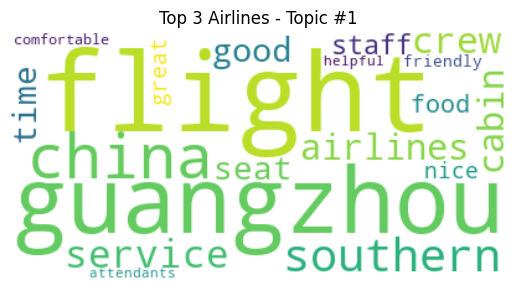

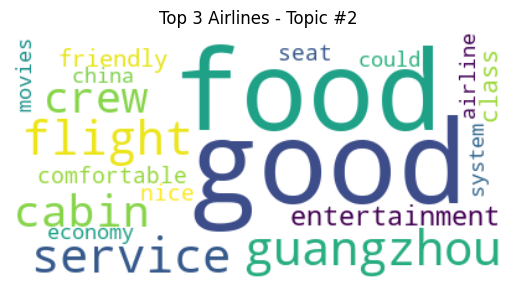

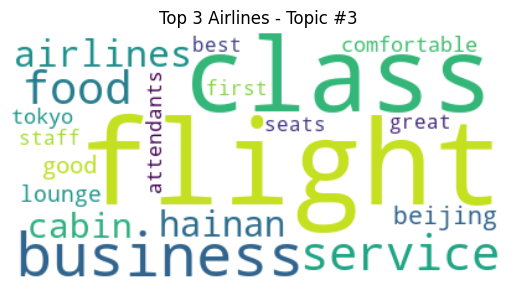

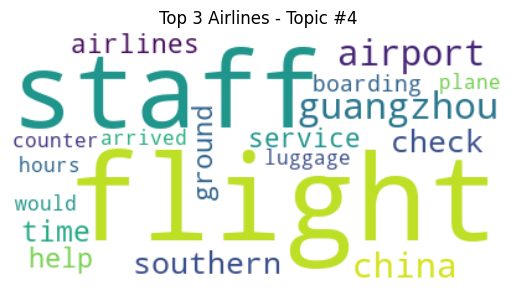

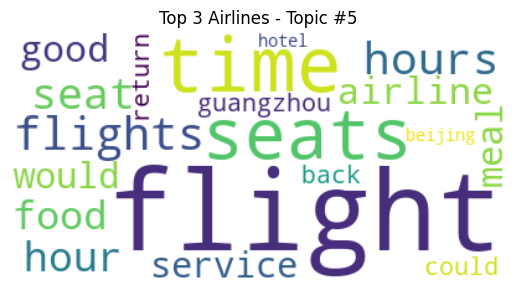

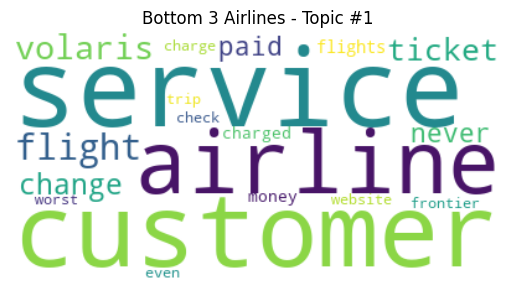

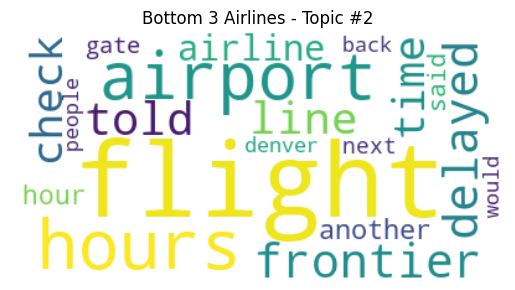

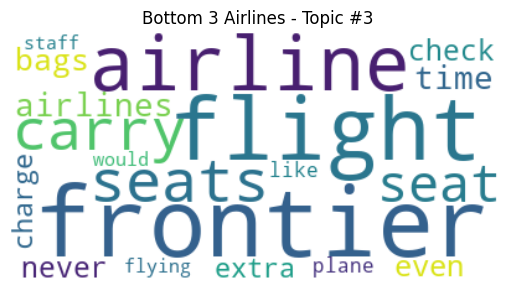

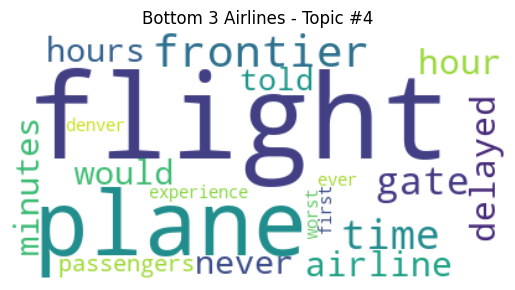

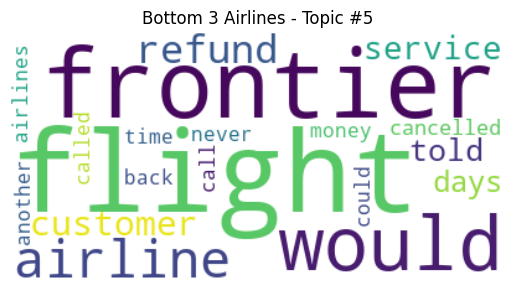

In [73]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate WordClouds
def plot_wordclouds(lda_model, feature_names, title):
    for topic_idx, topic in enumerate(lda_model.components_):
        word_freq = {feature_names[i]: topic[i] for i in topic.argsort()[:-20:-1]}
        wc = WordCloud(background_color='white').generate_from_frequencies(word_freq)
        plt.figure()
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"{title} - Topic #{topic_idx+1}")
        plt.show()

plot_wordclouds(lda_top, ReducedTerm_top, "Top 3 Airlines")
plot_wordclouds(lda_bottom, ReducedTerm_bottom, "Bottom 3 Airlines")


<a id = "cell_Practicalimplication"></a>
### 5. Practical Implication



**Practical Implication**

Drawing upon the findings from the sentiment analysis, rating trends, recommendation counts, and topic modeling of airline reviews, we propose the following **strategic and operational recommendations** to help the client enhance customer satisfaction and differentiate in a competitive market.

---

**1. Improve End-to-End Service Quality**

Passengers flying with top-rated airlines consistently highlighted positive service experiences using terms like **“comfortable,” “friendly,” “excellent,”** and **“helpful.”** In contrast, bottom-rated airlines were frequently associated with negative experiences such as **“rude staff,” “delays,” “poor service,”** and **“cancellation issues.”**

**Recommendations:**
- Conduct customer service training across all touchpoints (check-in, in-flight, ground).
- Establish clear protocols for **refunds**, **compensation**, and **rebooking**, which were recurring pain points in low-rated airlines.
- Use **mystery shopping programs** or real-time NPS (Net Promoter Score) feedback to monitor service delivery.

---

**2. Enhance Cabin Experience Across Classes**

In high-performing airlines, topics around **meal quality**, **entertainment**, and **comfort** were common positive highlights. Business class travelers in particular responded well to quality meals and personalized service, while economy passengers valued efficiency and cleanliness.

**Recommendations:**
- For **Economy class**: Focus on **efficient boarding**, **clean seating**, and **pleasant crew interaction**.
- For **Business class**: Maintain or improve **premium meal service**, **lounge access**, and **attention to detail** in amenities.

---

**3. Use Data-Driven Benchmarking Against Top Airlines**

Airlines like **Hainan Airlines**, **EVA Air**, and **ANA** consistently received the highest overall scores and positive sentiment ratings. These airlines appear to manage both operational excellence and customer expectations effectively.

**Recommendations:**
- Analyze operations, service models, and customer touchpoints of these top airlines.
- Identify gaps where client airline services deviate from industry leaders.
- Integrate successful practices, such as loyalty program design, staff culture, or technology use (e.g., real-time delay alerts).

---

**4. Address Operational Weaknesses Promptly**

Among the bottom-rated airlines, common negative topics included **delayed flights**, **lost baggage**, **poor communication**, and **unclear refund policies**. These operational failures directly impacted customer satisfaction and sentiment.

**Recommendations:**
- Invest in **baggage tracking systems**, **automated delay notifications**, and **refund status portals**.
- Improve coordination with third-party ground services, which are often blamed for check-in and baggage issues.
- Use operational KPIs (on-time performance, baggage mishandling rate) as leading indicators of service quality.

---

**5. Leverage Sentiment and Topic Insights for Continuous Monitoring**

Text analytics has revealed rich insights into customer priorities and concerns. Passengers spoke frequently about **flight timing, delays, meals, staff behavior**, and **airport experience**. These topics offer a granular view of what matters most to passengers.

**Recommendations:**
- Build a **real-time review monitoring system** using NLP to track and classify complaints and compliments.
- Tie sentiment trends to internal metrics (e.g., flight delays vs. negative reviews about “waiting”).
- Use sentiment dashboards to prioritize action by department or route.

---

**6. Use Review Trends to Inform Marketing and Brand Messaging**

Positive feedback in sentiment and word frequency around **“service,” “entertainment,” “crew,”** and **“cleanliness”** offer marketing opportunities. Airlines can highlight these strengths in their brand messaging to attract passengers who prioritize these elements.

**Recommendations:**
- Highlight customer-rated strengths in digital campaigns (e.g., “Top-rated service for business travelers”).
- Use **positive reviews** as social proof on booking platforms and the airline’s website.
- Run targeted campaigns for market segments where satisfaction scores are highest.

---

**7. Tailor Improvements to Cabin Type and Route**

Topic modeling for different cabin classes revealed distinct concerns: Business travelers prioritized **comfort, lounges, and staff behavior**, while Economy travelers focused more on **value, delays, and baggage**.

**Recommendations:**
- Customize service enhancements by **cabin type and passenger profile**.
- For example, on high-frequency business routes, invest in **lounge experience and punctuality**.
- On economy-heavy holiday routes, emphasize **value**, **clear communication**, and **efficient boarding**.

---

**8. Track Airline Performance Over Time**

Airlines like **Qantas Airways** showed a **declining trend in overall ratings** over time, while top airlines showed more consistent or improving trends. Understanding the timing and context behind these changes can provide early warnings or success signals.

**Recommendations:**
- Regularly review monthly or quarterly sentiment and rating trends.
- Investigate external factors (e.g., route changes, service cuts, PR events) that coincide with major shifts.
- Incorporate time-series dashboards into internal reporting tools.

---

By taking these steps, the client can **proactively manage customer experience**, respond rapidly to emerging issues, and ultimately enhance **loyalty, recommendation rates**, and **competitive advantage** in the airline market.




### **References:**

- Joshi, P. (2018). *Text Mining 101: A Stepwise Introduction to Topic Modeling using Latent Semantic Analysis (using Python).* [https://www.analyticsvidhya.com/blog/2018/10/stepwise-guide-topic-modeling-latent-semantic-analysis/](https://www.analyticsvidhya.com/blog/2018/10/stepwise-guide-topic-modeling-latent-semantic-analysis/)

- Kapadia, S. (2015). *Topic Modeling in Python: Latent Dirichlet Allocation (LDA).* [https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0](https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0)

- Kapadia, S. (2019). *Evaluate Topic Models: Latent Dirichlet Allocation (LDA).* [https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0](https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0)

- Scikit-learn Developers. (n.d.). *Feature extraction — Text feature extraction using CountVectorizer.* [https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)

- Rehurek, R., & Sojka, P. (2010). *Software Framework for Topic Modelling with Large Corpora.* [https://radimrehurek.com/gensim/](https://radimrehurek.com/gensim/)

- Google Developers. (n.d.). *TextBlob: Simplified Text Processing.* [https://textblob.readthedocs.io/en/dev/](https://textblob.readthedocs.io/en/dev/)

- Waskom, M. L. (2021). *Seaborn: Statistical data visualization.* [https://seaborn.pydata.org/](https://seaborn.pydata.org/)

- McKinney, W. (2010). *Data Structures for Statistical Computing in Python.* [https://pandas.pydata.org/](https://pandas.pydata.org/)

